### Adjacency method for different variables and different thresholds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
from itertools import combinations
from scipy import spatial
import pickle as pickle
import gudhi
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import io
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageChops, ImageFont
import shapely.geometry as geom
from shapely.ops import unary_union
import warnings

import invr

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Creating the test dataset

In [2]:
Washington_Arlington_Alexandria_DC_VA_MD_WV_Counties = gpd.read_file('./data/DCMetroArea/DC_Metro_counties/Washington_Arlington_Alexandria_DC_VA_MD_WV_Counties.shp')

In [3]:
Washington_Arlington_Alexandria_DC_VA_MD_WV_Counties

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,Shape_Area,CBSAFP,METDIVFP,CSAFP,CBSA_Title,M_Status,MDIV_Title,CSA_Title,C_Status,geometry
0,734,54,037,01550025,54037,Jefferson,Jefferson County,06,H1,G4020,...,0.057252,47900,47894,548,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metropolitan Statistical Area,"Washington-Arlington-Alexandria, DC-VA-MD-WV","Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Outlying,"POLYGON ((-78.03541 39.27841, -78.03526 39.278..."
1,1266,24,009,01676636,24009,Calvert,Calvert County,06,H1,G4020,...,0.092340,47900,47894,548,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metropolitan Statistical Area,"Washington-Arlington-Alexandria, DC-VA-MD-WV","Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Outlying,"POLYGON ((-76.56813 38.40771, -76.57181 38.408..."
2,1297,24,033,01714670,24033,Prince George's,Prince George's County,06,H1,G4020,...,0.134028,47900,47894,548,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metropolitan Statistical Area,"Washington-Arlington-Alexandria, DC-VA-MD-WV","Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Central,"POLYGON ((-77.04202 38.74672, -77.04191 38.750..."
3,1299,24,017,01676992,24017,Charles,Charles County,06,H1,G4020,...,0.171903,47900,47894,548,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metropolitan Statistical Area,"Washington-Arlington-Alexandria, DC-VA-MD-WV","Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Outlying,"POLYGON ((-77.25505 38.56524, -77.25442 38.567..."
4,1310,24,021,01711211,24021,Frederick,Frederick County,06,H1,G4020,...,0.180931,47900,43524,548,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metropolitan Statistical Area,"Silver Spring-Frederick-Rockville, MD","Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Outlying,"POLYGON ((-77.62017 39.48470, -77.61951 39.485..."
5,1465,51,113,01494590,51113,Madison,Madison County,06,H1,G4020,...,0.085990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-78.43903 38.51684, -78.43899 38.516..."
6,1474,51,157,01673976,51157,Rappahannock,Rappahannock County,06,H1,G4020,...,0.071639,47900,47894,548,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metropolitan Statistical Area,"Washington-Arlington-Alexandria, DC-VA-MD-WV","Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Outlying,"POLYGON ((-78.26237 38.75855, -78.26209 38.758..."
7,1478,51,510,01498415,51510,Alexandria,Alexandria city,25,C7,G4020,...,0.004154,47900,47894,548,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metropolitan Statistical Area,"Washington-Arlington-Alexandria, DC-VA-MD-WV","Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Central,"POLYGON ((-77.14184 38.82552, -77.14177 38.825..."
8,1489,51,685,01498431,51685,Manassas Park,Manassas Park city,25,C7,G4020,...,0.000681,47900,47894,548,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metropolitan Statistical Area,"Washington-Arlington-Alexandria, DC-VA-MD-WV","Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Central,"POLYGON ((-77.47883 38.78259, -77.47528 38.786..."
9,1501,51,600,01789070,51600,Fairfax,Fairfax city,25,C7,G4020,...,0.001688,47900,47894,548,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metropolitan Statistical Area,"Washington-Arlington-Alexandria, DC-VA-MD-WV","Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Central,"POLYGON ((-77.33485 38.85374, -77.33480 38.853..."


In [4]:
us_svi = gpd.read_file('./data/DCMetroArea/SVI2020_US_county.gdb')

In [5]:
us_svi

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE,Shape_Length,Shape_Area,geometry
0,01,Alabama,AL,01001,Autauga,01001,"Autauga County, Alabama",594.455838,55639,0,...,0.2,0.0,0.1,2.0,0.7,0.2,0.3,2.052888,0.150259,"MULTIPOLYGON (((-86.92120 32.65754, -86.92035 ..."
1,01,Alabama,AL,01003,Baldwin,01003,"Baldwin County, Alabama",1589.835294,218289,0,...,0.2,0.0,0.1,1.9,0.4,0.3,0.2,4.278488,0.409924,"MULTIPOLYGON (((-88.02858 30.22676, -88.02399 ..."
2,01,Alabama,AL,01005,Barbour,01005,"Barbour County, Alabama",885.007618,25026,0,...,0.3,0.0,0.1,1.3,0.6,0.6,0.4,2.569455,0.223268,"MULTIPOLYGON (((-85.74803 31.61918, -85.74543 ..."
3,01,Alabama,AL,01007,Bibb,01007,"Bibb County, Alabama",622.469288,22374,0,...,0.1,0.0,0.2,0.4,0.3,0.0,0.2,1.886874,0.156518,"MULTIPOLYGON (((-87.42194 33.00338, -87.31854 ..."
4,01,Alabama,AL,01009,Blount,01009,"Blount County, Alabama",644.890375,57755,0,...,0.1,0.1,0.1,1.8,0.3,0.3,0.4,2.391048,0.164413,"MULTIPOLYGON (((-86.96336 33.85822, -86.95967 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56,Wyoming,WY,56037,Sweetwater,56037,"Sweetwater County, Wyoming",10426.975770,43352,0,...,0.4,0.0,0.1,2.2,0.8,0.2,0.3,7.660062,2.937306,"MULTIPOLYGON (((-110.05438 42.01103, -110.0543..."
3139,56,Wyoming,WY,56039,Teton,56039,"Teton County, Wyoming",3996.846846,23356,0,...,0.2,0.1,0.1,1.0,0.6,0.6,0.8,5.080816,1.224489,"MULTIPOLYGON (((-111.05361 44.66627, -110.7507..."
3140,56,Wyoming,WY,56041,Uinta,56041,"Uinta County, Wyoming",2081.719808,20374,0,...,0.3,0.0,0.2,2.2,0.4,0.0,0.2,3.158552,0.581250,"MULTIPOLYGON (((-111.04662 41.15604, -111.0465..."
3141,56,Wyoming,WY,56043,Washakie,56043,"Washakie County, Wyoming",2238.678265,7933,0,...,0.4,0.0,0.4,3.2,0.5,0.4,0.4,4.246732,0.650686,"MULTIPOLYGON (((-108.55063 44.15179, -108.5505..."


In [6]:
# filter us_svi to only include the DC metro area by matching Washington_Arlington_Alexandria_DC_VA_MD_WV_Counties GEOID column to us_svi STCNTY column
dc_svi = us_svi[us_svi['STCNTY'].isin(Washington_Arlington_Alexandria_DC_VA_MD_WV_Counties['GEOID'])]

In [7]:
#desired_columns = ["FIPS","geometry","EP_POV150","EP_UNEMP","EP_HBURD","EP_NOHSDP","EP_UNINSUR","EP_AGE65","EP_AGE17","EP_DISABL","EP_SNGPNT","EP_LIMENG","EP_MINRTY","EP_MUNIT","EP_MOBILE","EP_CROWD","EP_NOVEH","EP_GROUPQ"]
desired_columns = ['FIPS','geometry','EP_CROWD', 'EP_LIMENG', 'EP_MINRTY', 'EP_HBURD', 'EP_SNGPNT']


In [8]:
dc_filtered = dc_svi[desired_columns]

In [9]:
#reset index
dc_filtered = dc_filtered.reset_index(drop=True)

In [10]:
dc_filtered.head(3)

,FIPS,geometry,EP_CROWD,EP_LIMENG,EP_MINRTY,EP_HBURD,EP_SNGPNT
0,11001,"MULTIPOLYGON (((-77.11976 38.93434, -77.11253 ...",3.6,2.4,63.3,27.2,6.9
1,24009,"MULTIPOLYGON (((-76.70121 38.71276, -76.69914 ...",0.5,0.3,22.4,19.0,4.6
2,24017,"MULTIPOLYGON (((-77.27382 38.48356, -77.27240 ...",1.8,1.0,61.7,21.8,8.2


In [11]:
#standardize selected columns
#make selected columns between 0 and 1
for column in desired_columns[2:]:
    dc_filtered[column] = (dc_filtered[column] - dc_filtered[column].min())/(dc_filtered[column].max() - dc_filtered[column].min())

In [12]:
dc_filtered.head(3)

,FIPS,geometry,EP_CROWD,EP_LIMENG,EP_MINRTY,EP_HBURD,EP_SNGPNT
0,11001,"MULTIPOLYGON (((-77.11976 38.93434, -77.11253 ...",0.516667,0.188034,0.678947,0.558559,0.774194
1,24009,"MULTIPOLYGON (((-76.70121 38.71276, -76.69914 ...",0.000000,0.008547,0.140789,0.189189,0.403226
2,24017,"MULTIPOLYGON (((-77.27382 38.48356, -77.27240 ...",0.216667,0.068376,0.657895,0.315315,0.983871


In [13]:
#get the range of the data in the selected columns
for column in desired_columns[2:]:
    print(column, dc_filtered[column].min(), dc_filtered[column].max())

EP_CROWD 0.0 1.0
EP_LIMENG 0.0 1.0
EP_MINRTY 0.0 1.0
EP_HBURD 0.0 1.0
EP_SNGPNT 0.0 1.0


Generate adjacent counties

In [14]:
def generate_adjacent_counties(dataframe,filtration_threshold,variable_name):
    filtered_df = dataframe[dataframe[variable_name] < filtration_threshold]

    # Perform a spatial join to find adjacent precincts
    adjacent_counties = gpd.sjoin(filtered_df, filtered_df, predicate='intersects', how='left')

    # Filter the results to include only the adjacent states
    adjacent_counties = adjacent_counties.query('sortedID_left != sortedID_right')

    # Group the resulting dataframe by the original precinct Name and create a list of adjacent precinct Name
    adjacent_counties = adjacent_counties.groupby('sortedID_left')['sortedID_right'].apply(list).reset_index()

    adjacent_counties.rename(columns={'sortedID_left': 'county', 'sortedID_right': 'adjacent'}, inplace=True)

    adjacencies_list = adjacent_counties['adjacent'].tolist()
    county_list = adjacent_counties['county'].tolist()

    merged_df = pd.merge(adjacent_counties, dataframe, left_on='county',right_on='sortedID', how='left')
    merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')

    return adjacencies_list,merged_df,county_list

In [15]:
def form_simplicial_complex(adjacent_county_list,county_list):
    max_dimension = 3

    V = []
    V = invr.incremental_vr(V, adjacent_county_list, max_dimension,county_list)

    return V
    

In [16]:
def fig2img(fig):
     #convert matplot fig to image and return it

     buf = io.BytesIO()
     fig.savefig(buf)
     buf.seek(0)
     img = Image.open(buf)
     return img

In [17]:
def plot_simplicial_complex(dataframe,V):

    #city centroids
    city_coordinates = {city.sortedID: np.array((city.geometry.centroid.x, city.geometry.centroid.y)) for _, city in dataframe.iterrows()}

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_axis_off() 

    # Plot the "wyoming_svi" DataFrame
    dataframe.plot(ax=ax, edgecolor='black', linewidth=0.3, color="white")

    # Plot the centroid of the large square with values
    for i, row in dataframe.iterrows():
        centroid = row['geometry'].centroid
        # text_to_display = f"FIPS: {row['FIPS']}\nFilteration: {row['EP_SNGPNT']}"
        plt.text(centroid.x, centroid.y, str(row['sortedID']), fontsize=15, ha='center', color="black")
        # plt.text(centroid.x, centroid.y, text_to_display, fontsize=10, ha='center', color="black")

    for edge_or_traingle in V:

        
        if len(edge_or_traingle) == 2:
            # Plot an edge
            ax.plot(*zip(*[city_coordinates[vertex] for vertex in edge_or_traingle]), color='red', linewidth=2)
            # img = fig2img(fig)
            # list_gif.append(img)
        elif len(edge_or_traingle) == 3:
            # Plot a triangle
            ax.add_patch(plt.Polygon([city_coordinates[vertex] for vertex in edge_or_traingle], color='green', alpha=0.2))
            # img = fig2img(fig)
            # list_gif.append(img)
    plt.show()
    plt.close()

    #return list_gif #deleted  plot_simplicial_complex(dataframe,V,list_gif) --> list part

##### Multiple variable code starts here

In [18]:
# dc - 'EP_CROWD', 'EP_LIMENG', 'EP_MINRTY', 'EP_HBURD', 'EP_SNGPNT'
# define a dictionary wich has name and a value
# selected_variables_and_threshold = {'EP_CROWD': 0.5, 'EP_LIMENG': 0, 'EP_MINRTY': 0.5, 'EP_HBURD': 0.5, 'EP_SNGPNT': 0.5}
selected_variables_and_threshold = {'EP_SNGPNT': 0.7}

In [19]:
# create a empty dictionary
edges_and_traingles_for_each_variable = {}

[]
[]
[]
[]
[2]
[3]
[0]
[2, 4]
[0, 6]
[1, 3, 5, 8]
[9]
[0, 2, 8, 9]
[8]
[3, 8, 10, 13]
[0, 2, 12]
[8, 10, 12]
[9, 11, 12, 16]


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_51154/2007581183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one_variable.sort_values(by='EP_SNGPNT', inplace=True)
/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


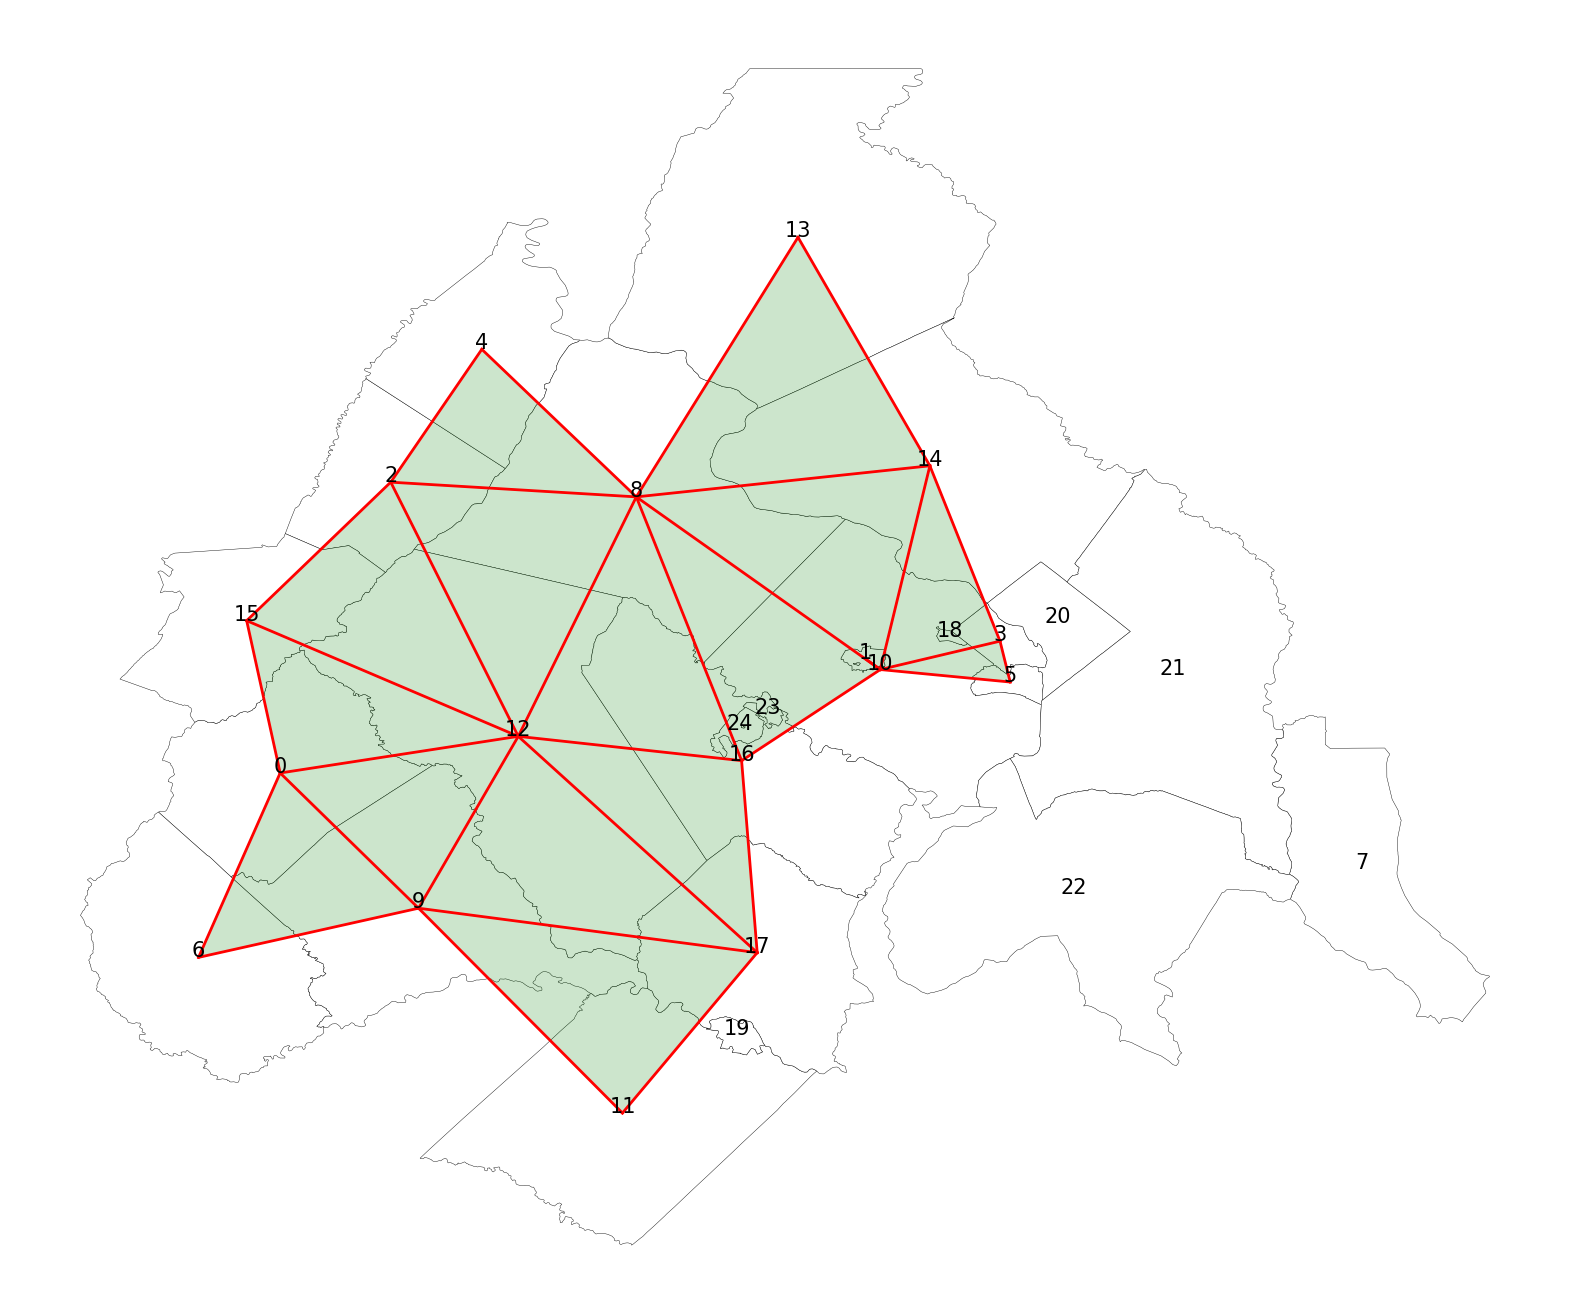

In [20]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = dc_filtered[['FIPS','EP_SNGPNT', 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable.sort_values(by='EP_SNGPNT', inplace=True)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,0.77,'EP_SNGPNT')

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable[variable_name] = V

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    plot_simplicial_complex(df_one_variable,V)